# Fase 2


## Conocimiento de los datos


### Recolección inicial de datos

- [Diccionario de Datos](diccionario-de-datos/README.md)
- Deportes de vientos ideales para practicar en el continente australiano (declarados en la fase 1 - comprensión del negocio)
- [GEODATA](https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/61395)
- Cargar [csv con el conjunto de datos](dataset/weatherAUS.csv)

In [302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import folium
from IPython.display import display


In [303]:
csv = 'dataset/weatherAUS.csv'
df = pd.read_csv(csv,sep=",")

### Descripción de los datos


#### Columnas (características)

In [264]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

#### Resumen Estadístico

Características numéricas

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


#### Información de Características

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Tipos de Datos

In [267]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### Exploración

#### Primeros Registros

In [268]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


#### Últimos Registros

In [269]:
df.tail().T

,142188,142189,142190,142191,142192
Date,2017-06-20,2017-06-21,2017-06-22,2017-06-23,2017-06-24
Location,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,3.5,2.8,3.6,5.4,7.8
MaxTemp,21.8,23.4,25.3,26.9,27.0
Rainfall,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,E,E,NNW,N,SE
WindGustSpeed,31.0,31.0,22.0,37.0,28.0
WindDir9am,ESE,SE,SE,SE,SSE


#### Histograma

Característica numérica WindGustSpeed (Velocidad máxima de ráfagas de viento en kilómetros por hora.)

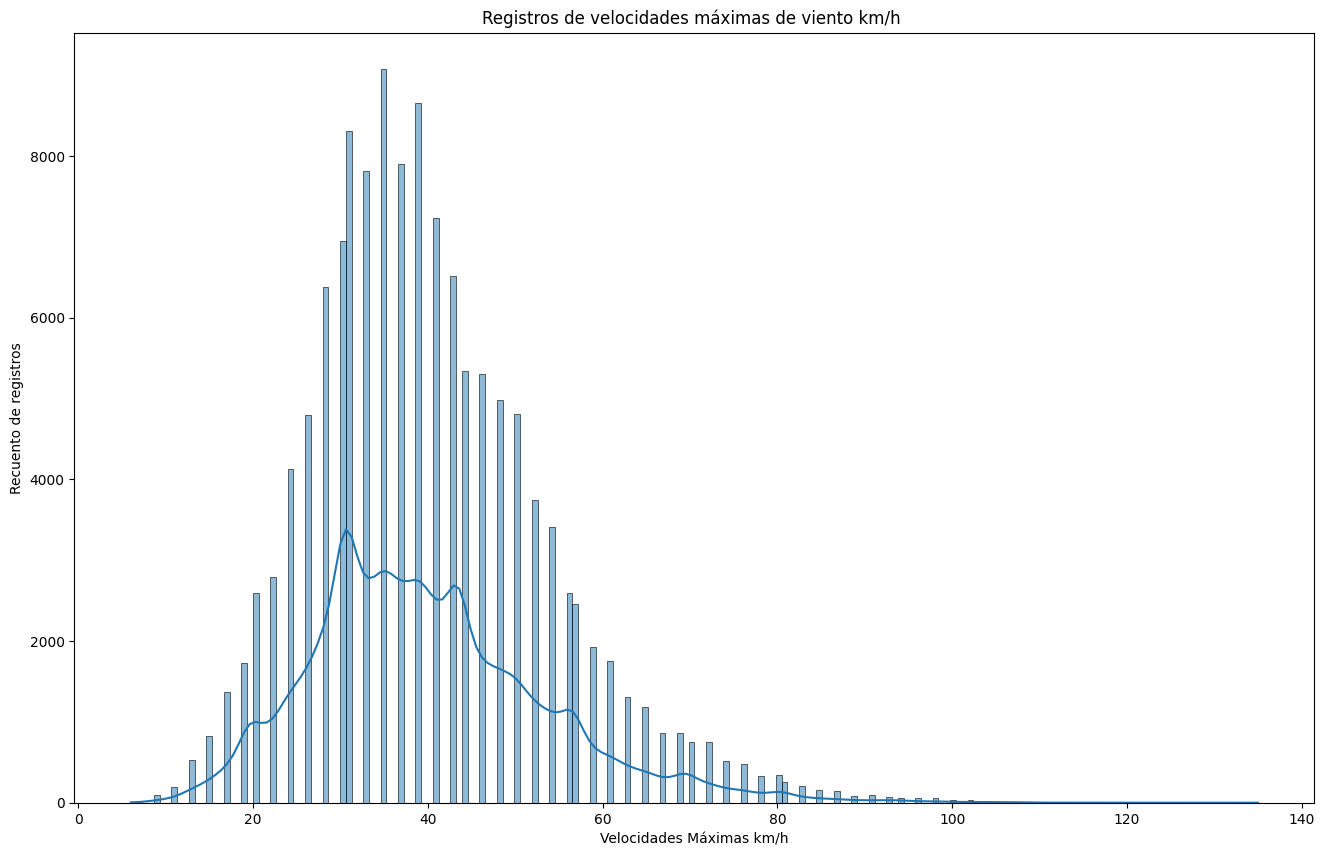

In [270]:

plt.title('Registros de velocidades máximas de viento km/h ')
plt.xlabel('Velocidades Máximas km/h')
plt.ylabel('Recuento de registros')
plt.rcParams["figure.figsize"] = (20, 6)

sns.histplot(df['WindGustSpeed'], kde=True)
plt.show()


##### Tabla de Frecuencia Relativa

In [271]:
dfFrecuenciaWindGustSpeed = pd.DataFrame(df["WindGustSpeed"].value_counts("%").apply(lambda x: str(round(x * 100, 2)) + "%"))
dfFrecuenciaWindGustSpeed.T.sort_index()

WindGustSpeed,35.0,39.0,31.0,37.0,33.0,41.0,30.0,43.0,28.0,44.0,...,115.0,117.0,135.0,111.0,120.0,122.0,126.0,124.0,130.0,6.0
proportion,6.82%,6.51%,6.25%,5.95%,5.88%,5.44%,5.22%,4.9%,4.8%,4.02%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


#### Gráfico de Barras

Revisamos la cantidad de registros por característica categórica Location

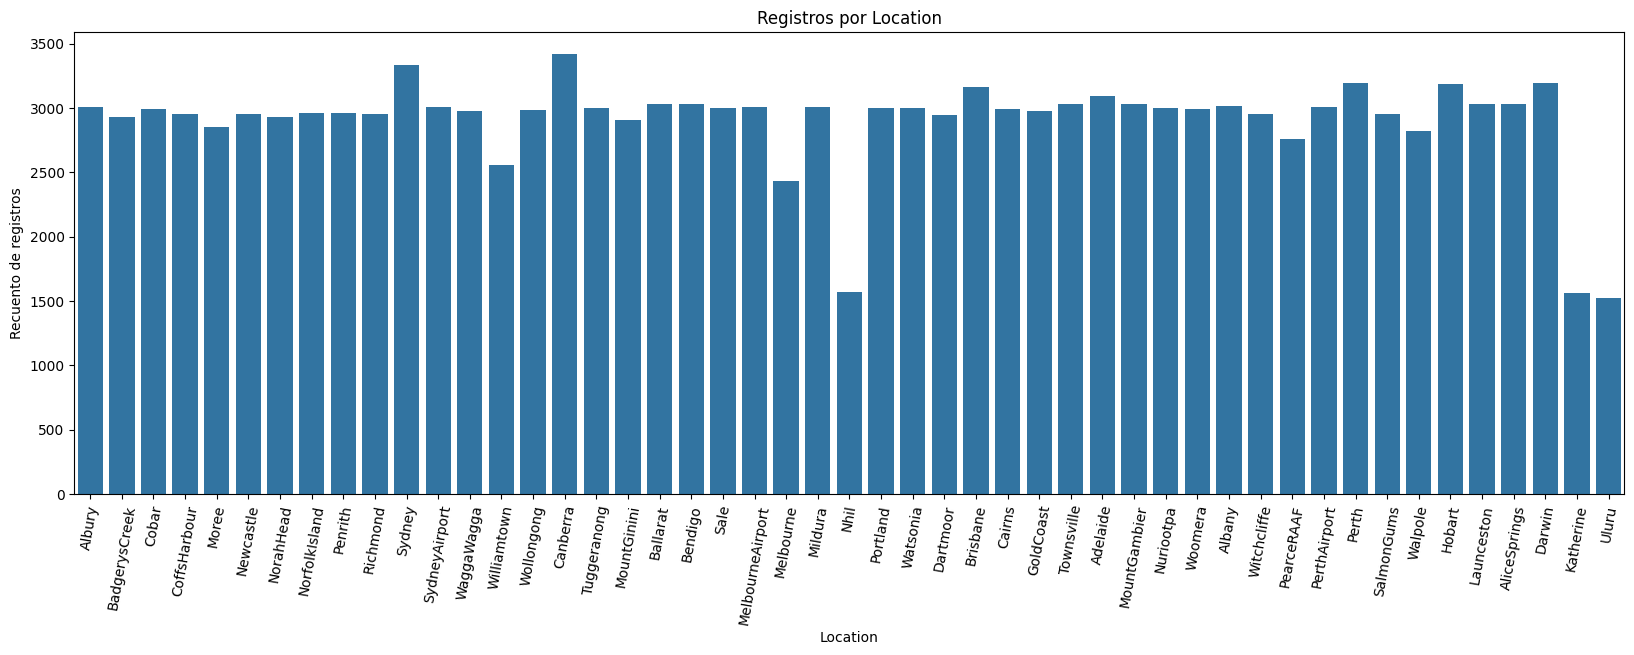

In [272]:
plt.title('Registros por Location')
plt.xlabel('Location')
plt.ylabel('Recuento de registros')
plt.xticks(rotation=80)
sns.countplot(x='Location', data=df)
plt.show()

#### Geo Referencia

[CRS](glosario/CRS.md)

In [273]:
# DataFrame para almacenar las ubicaciones y la cantidad de registros por cada Location

dfLocationCount = df["Location"].value_counts().reset_index()
dfLocationCount.columns = ['Location','Count']
dfLocationCount['Location'] = dfLocationCount['Location']

# Función para obtener las coordenadas de latitud y longitud
def obtener_lat_long(ubicacion):
    geolocalizador = Nominatim(user_agent="nombre_de_usuario")
    ubicacion = geolocalizador.geocode('Australia, '+ubicacion)
    if ubicacion:
        return ubicacion.latitude, ubicacion.longitude
    else:
        return None, None

# Aplicar la función a cada fila de la columna 'Location'
dfLocationCount['Latitud'], dfLocationCount['Longitud'] = zip(*dfLocationCount['Location'].apply(obtener_lat_long))

# Eliminar location que no encontramos latitud y longitud
dfLocationCount = dfLocationCount.dropna()


##### Identificar si es ciudad costera

In [274]:
# Cargar el shapefile de las líneas costeras
coastlines = gpd.read_file('./lib/natural-earth-vector/10m_physical/ne_110m_coastline.shp')
# Crear una columna con la geometría de los puntos
dfLocationCount['Coordinates'] = list(zip(dfLocationCount['Longitud'], dfLocationCount['Latitud']))
dfLocationCount['Coordinates'] = dfLocationCount['Coordinates'].apply(Point)

# Convertir el DataFrame a un GeoDataFrame y asignar un CRS (si no está definido)
gdf = gpd.GeoDataFrame(dfLocationCount, geometry='Coordinates')

# Verificar que los GeoDataFrames tengan el mismo CRS
if coastlines.crs is None:
    coastlines.set_crs(epsg=4326, inplace=True)  # EPSG 4326 es WGS84, un CRS común para coordenadas geográficas

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)  # Asignar EPSG 4326 si no está definido

# Reproyectar ambos GeoDataFrames a un CRS proyectado adecuado (por ejemplo, EPSG:3857, que es un CRS métrico)
coastlines = coastlines.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

# Crear una columna para verificar si la ciudad es costera. validamos si tiene una distancia menor a 10.000 metros (10 kilometros)
gdf['Is_Coastal'] = gdf['Coordinates'].apply(lambda point: coastlines.distance(point).min() < 10000)

# guardamos GeoDataFrame con las ubicaciones y sus metadatos (latitud, longitud y cantidad de registros)
gdf.to_csv('./dataset/weatherAUS_Locations.csv',index=False)

# Crear copia del geo dataframe
dfLocations = gdf.copy()

# Separar en ciudades costeras y no costeras
ciudades_si_costeras = dfLocations.query('Is_Coastal == True')
ciudades_no_costeras = dfLocations.query('Is_Coastal == False')


##### Mapas Centrado en Australia 

In [275]:
mapa = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

In [276]:
# Ciudades Costeras
# Añadir marcadadores en mapa
for idx, row in ciudades_si_costeras.iterrows():
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup= row["Location"],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Mostrar el mapa
display(mapa)

In [277]:
# Ciudades no Costeras
# Añadir marcadadores en mapa
for idx, row in ciudades_no_costeras.iterrows():
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup= row["Location"],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Mostrar el mapa
display(mapa)

#### Registros por Año

- Transformamos característica Date usando to_datetime()
- Creamos variable "cantidad_por_años" para almacenar la cantidad de registros por año
- Creamos variable "ax" para usar co

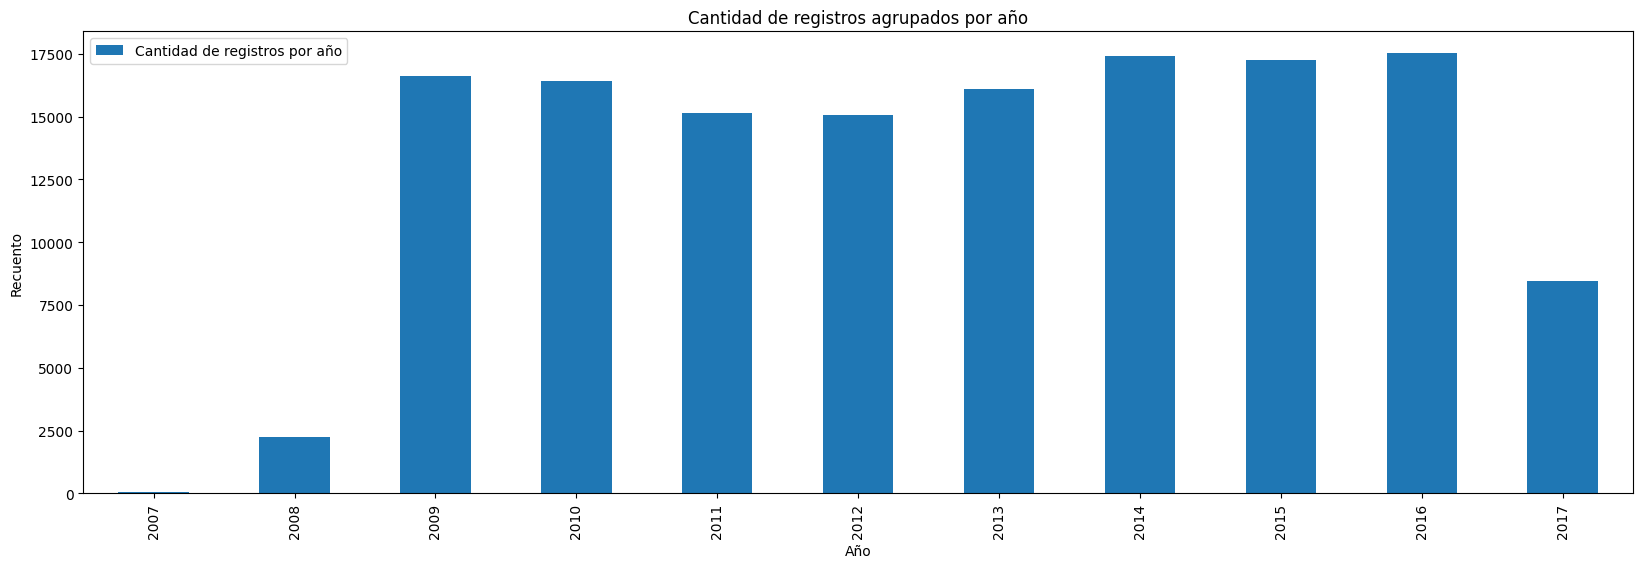

In [278]:
df['Date'] = pd.to_datetime(df['Date'])
cantidad_por_años = df['Date'].dt.year.value_counts().sort_index()
cantidad_por_años.plot(kind='bar', label='Cantidad de registros por año')
plt.title('Cantidad de registros agrupados por año')
plt.xlabel('Año')
plt.ylabel('Recuento')
plt.legend(loc='upper left')
plt.show()

##### Tabla de Frecuencia Absoluta

registros por año

In [279]:
dfFrecuenciaYear = pd.DataFrame(df['Date'].dt.year.value_counts().sort_index())
dfFrecuenciaYear

,count
Date,
2007,61
2008,2246
2009,16595
2010,16419
2011,15126
2012,15044
2013,16097
2014,17400
2015,17231


#### Registros por Ciudad

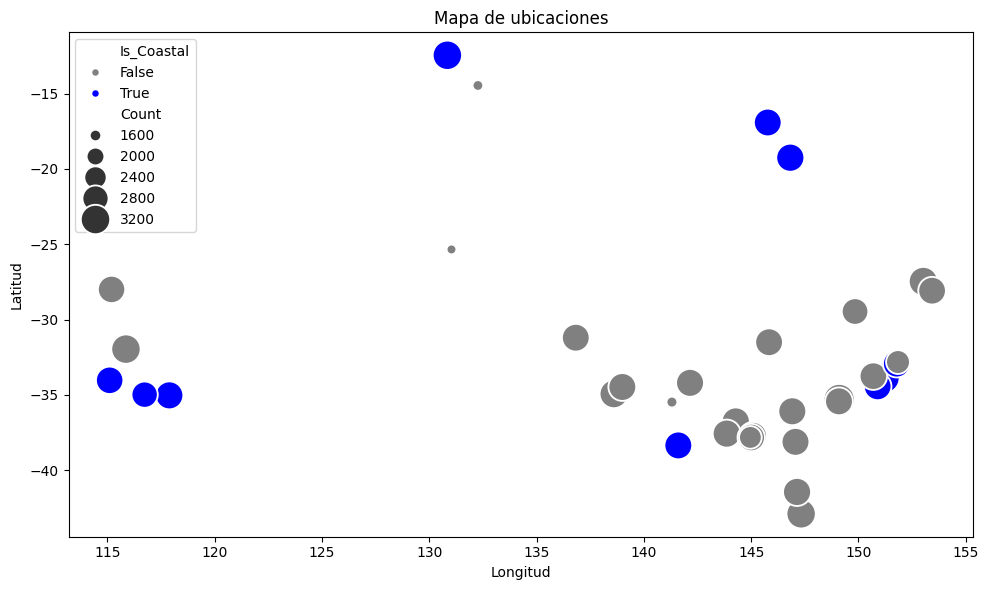

In [280]:

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el mapa de puntos
sns.scatterplot(data=dfLocations, x='Longitud', y='Latitud', size='Count', hue='Is_Coastal', palette=['grey', 'blue'], sizes=(50, 500),legend='auto')

# Añadir título y etiquetas
plt.title('Mapa de ubicaciones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar la leyenda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Registros por Tipo de Ciudad

In [281]:
ciudades_si_costeras = pd.DataFrame(ciudades_si_costeras)
ciudades_no_costeras = pd.DataFrame(ciudades_no_costeras)


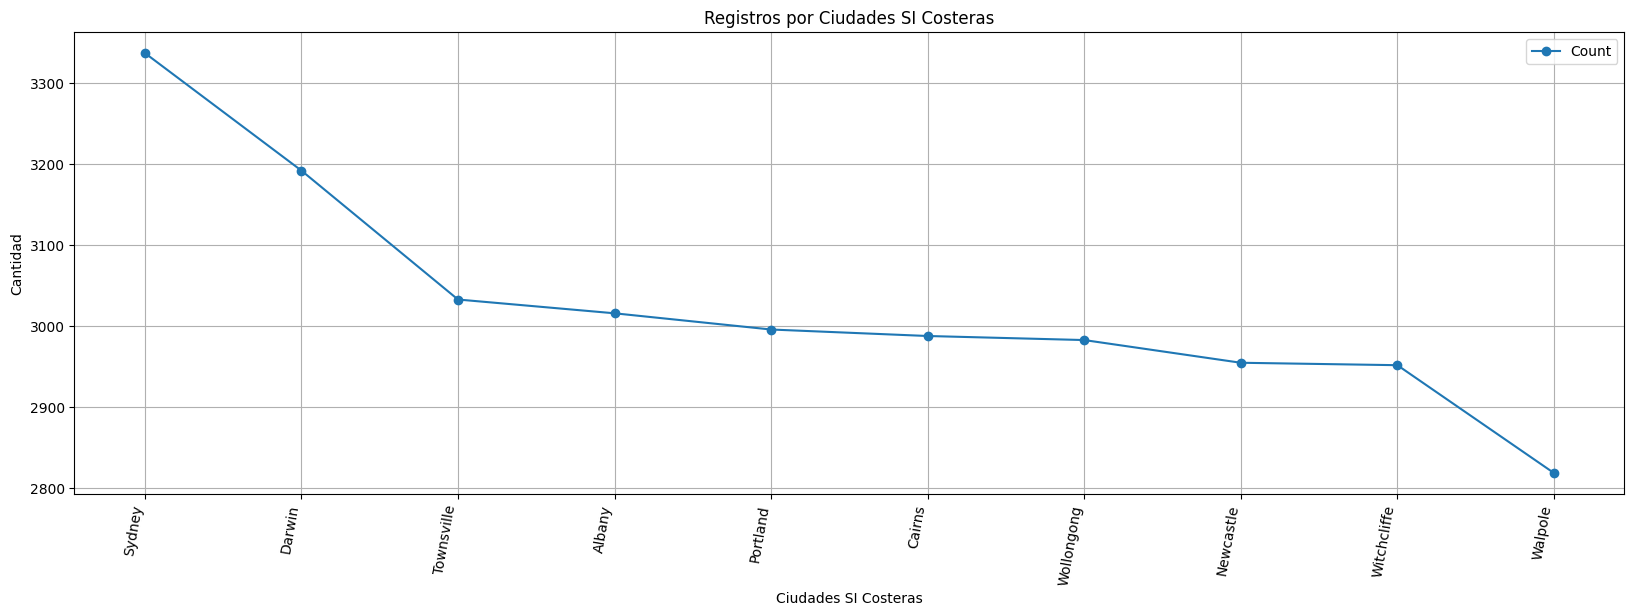

In [282]:
# Generar el gráfico de líneas
ax = ciudades_si_costeras.plot(x='Location', y='Count', marker='o')

# Añadir título y etiquetas
plt.title('Registros por Ciudades SI Costeras')
plt.xlabel('Ciudades SI Costeras')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=80)
ax.set_xticks(range(len(ciudades_si_costeras)))
ax.set_xticklabels(ciudades_si_costeras['Location'], rotation=80, ha='right')
plt.legend()
plt.show()

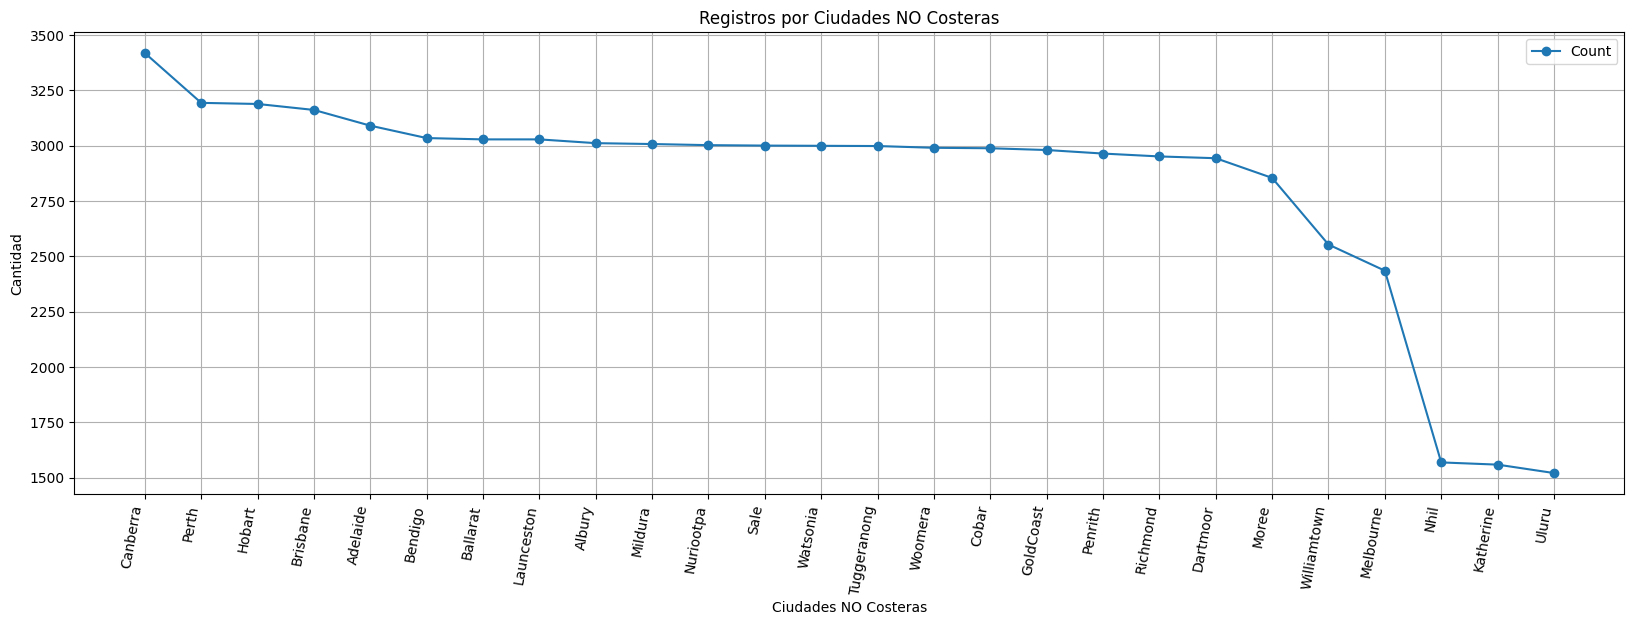

In [283]:
# Generar el gráfico de líneas
ax = ciudades_no_costeras.plot(x='Location', y='Count', marker='o')

# Añadir título y etiquetas
plt.title('Registros por Ciudades NO Costeras')
plt.xlabel('Ciudades NO Costeras')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=80)
ax.set_xticks(range(len(ciudades_no_costeras)))
ax.set_xticklabels(ciudades_no_costeras['Location'], rotation=80, ha='right')
plt.legend()
plt.show()

### Verificar la Calidad

#### Valores Nulos

In [284]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

#### Valores Duplicados

In [285]:
df.duplicated().sum()

0

#### Matriz de Correlación
##### Todas las Ciudades

In [294]:
data_corr = df.select_dtypes(include=['number']).corr()
data_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


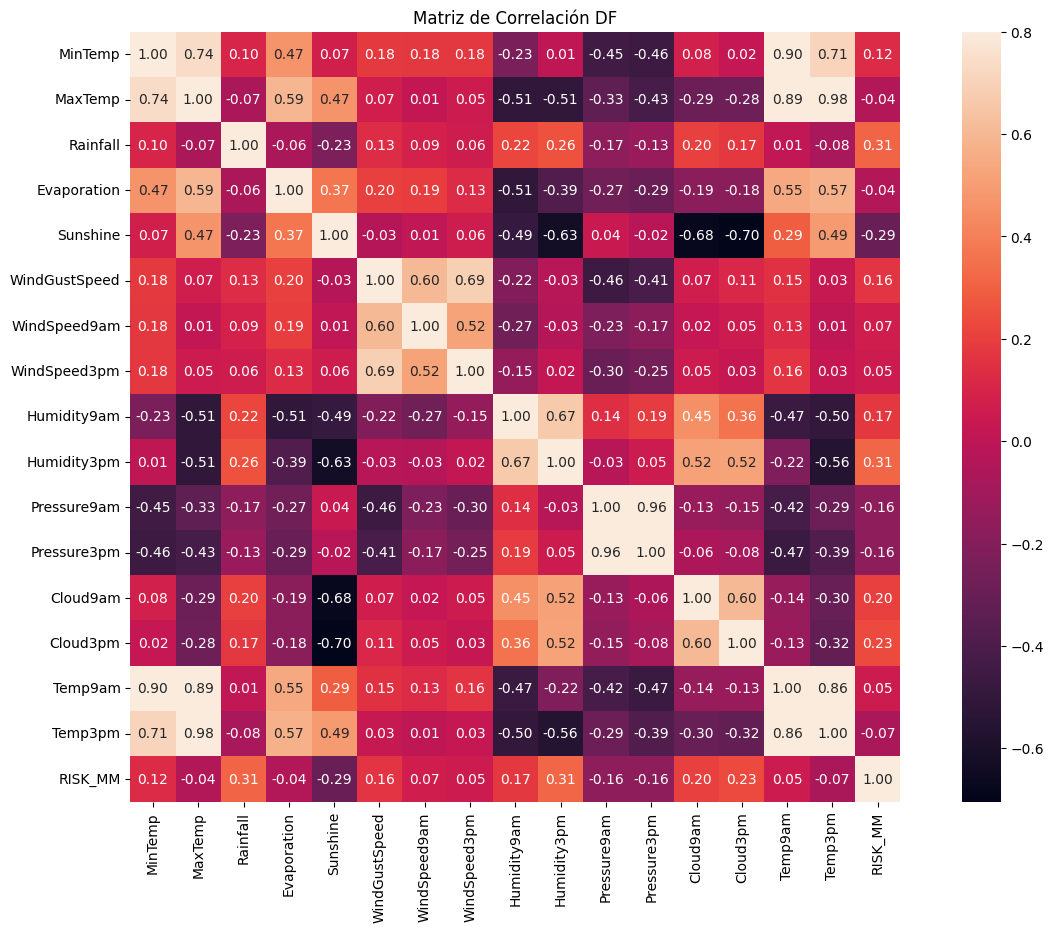

In [292]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(data_corr, vmax=.8, square=True, annot=True, fmt='.2f');
plt.title("Matriz de Correlación DF")
plt.show()

#####  Ciudades SI Costeras

In [295]:
grupo01 = df[df['Location'].isin(ciudades_si_costeras["Location"])]
data_corr = grupo01.select_dtypes(include=['number']).corr()
data_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.817385,0.089361,0.508900,0.079959,0.018402,0.093010,0.210035,-0.089312,0.024517,-0.472636,-0.527936,0.066234,0.010129,0.921187,0.815337,0.114553
MaxTemp,0.817385,1.000000,-0.037413,0.551286,0.359627,-0.091981,-0.046032,0.140016,-0.280409,-0.316662,-0.405355,-0.520894,-0.239166,-0.239209,0.921537,0.977931,-0.011302
Rainfall,0.089361,-0.037413,1.000000,-0.067513,-0.291760,0.181986,0.098819,0.025173,0.252682,0.252191,-0.185388,-0.148206,0.220240,0.213866,0.012071,-0.035275,0.348139
Evaporation,0.508900,0.551286,-0.067513,1.000000,0.338212,0.111497,0.139501,0.280889,-0.426570,-0.271286,-0.267273,-0.296890,-0.176816,-0.228788,0.568816,0.549474,-0.038523
Sunshine,0.079959,0.359627,-0.291760,0.338212,1.000000,-0.137437,-0.037735,0.175405,-0.489997,-0.573366,0.024871,-0.045016,-0.644644,-0.699883,0.248002,0.374281,-0.321509
WindGustSpeed,0.018402,-0.091981,0.181986,0.111497,-0.137437,1.000000,0.581232,0.583025,-0.131945,0.016986,-0.353413,-0.281612,0.135582,0.162299,-0.046038,-0.125664,0.202358
WindSpeed9am,0.093010,-0.046032,0.098819,0.139501,-0.037735,0.581232,1.000000,0.504181,-0.245905,-0.055226,-0.168878,-0.100513,0.080608,0.078039,0.036466,-0.047049,0.074161
WindSpeed3pm,0.210035,0.140016,0.025173,0.280889,0.175405,0.583025,0.504181,1.000000,-0.216221,-0.067126,-0.217782,-0.193886,-0.004381,-0.054026,0.221198,0.125846,0.028658
Humidity9am,-0.089312,-0.280409,0.252682,-0.426570,-0.489997,-0.131945,-0.245905,-0.216221,1.000000,0.614317,0.033208,0.073434,0.444799,0.392904,-0.271672,-0.262417,0.210169
Humidity3pm,0.024517,-0.316662,0.252191,-0.271286,-0.573366,0.016986,-0.055226,-0.067126,0.614317,1.000000,-0.061822,0.010773,0.496330,0.544567,-0.113592,-0.376602,0.318090


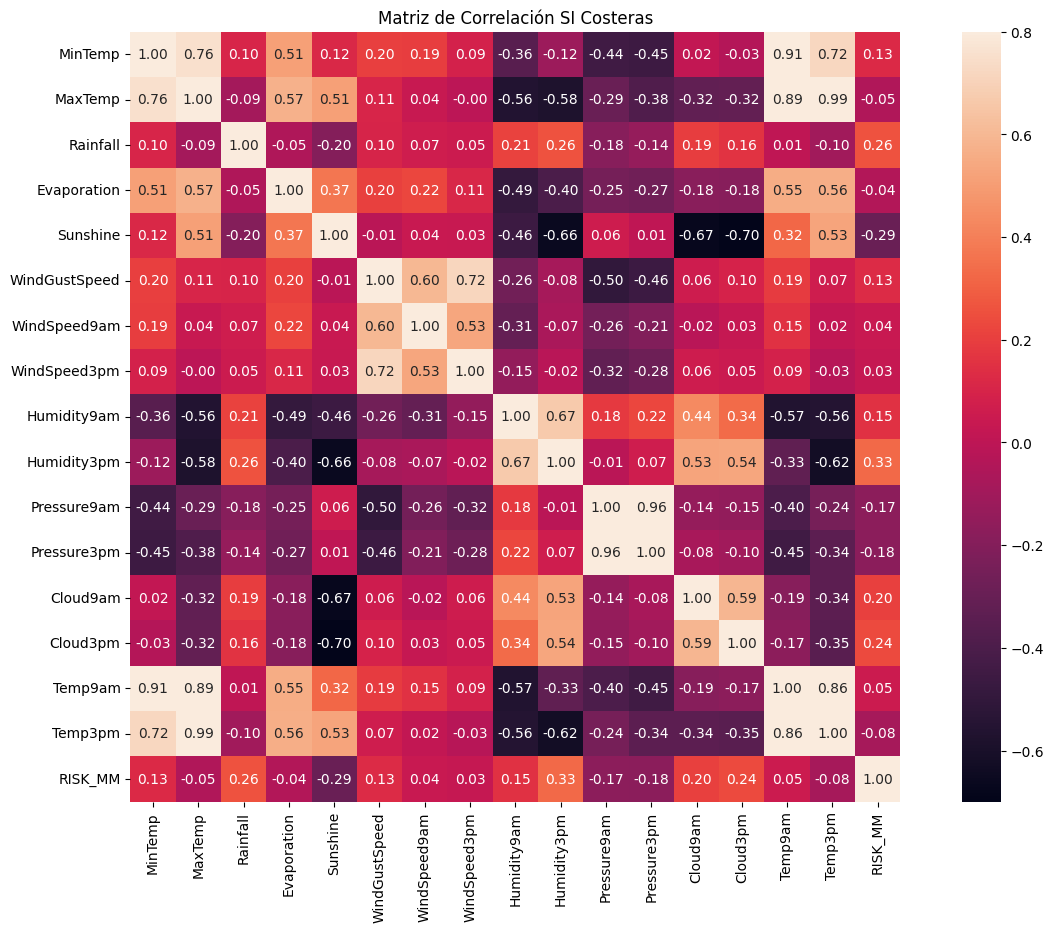

In [300]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(data_corr, vmax=.8, square=True, annot=True, fmt='.2f');
plt.title("Matriz de Correlación SI Costeras")
plt.show()

##### Ciudades NO Costeras

In [297]:
grupo02 = df[df['Location'].isin(ciudades_no_costeras["Location"])]
data_corr = grupo02.select_dtypes(include=['number']).corr()
data_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.757258,0.103251,0.507282,0.117969,0.200413,0.194413,0.089668,-0.355364,-0.119307,-0.444435,-0.453425,0.016586,-0.034588,0.907873,0.723140,0.125268
MaxTemp,0.757258,1.000000,-0.085710,0.574805,0.507590,0.105913,0.037180,-0.003051,-0.560333,-0.578756,-0.294305,-0.384502,-0.322459,-0.315280,0.889840,0.986578,-0.047514
Rainfall,0.103251,-0.085710,1.000000,-0.051151,-0.197221,0.101067,0.067081,0.054405,0.213786,0.259440,-0.184945,-0.139996,0.193078,0.156597,0.007283,-0.098535,0.256536
Evaporation,0.507282,0.574805,-0.051151,1.000000,0.372063,0.204777,0.223046,0.112493,-0.491122,-0.402679,-0.249567,-0.267095,-0.181823,-0.184152,0.554605,0.560225,-0.040547
Sunshine,0.117969,0.507590,-0.197221,0.372063,1.000000,-0.013384,0.042359,0.033812,-0.461153,-0.658386,0.058689,0.005402,-0.672614,-0.699382,0.322350,0.526914,-0.294644
WindGustSpeed,0.200413,0.105913,0.101067,0.204777,-0.013384,1.000000,0.598271,0.716588,-0.260519,-0.083728,-0.503175,-0.463151,0.059346,0.095428,0.187125,0.067298,0.129566
WindSpeed9am,0.194413,0.037180,0.067081,0.223046,0.042359,0.598271,1.000000,0.532226,-0.309055,-0.072465,-0.260055,-0.211952,-0.017386,0.030124,0.152027,0.019537,0.043518
WindSpeed3pm,0.089668,-0.003051,0.054405,0.112493,0.033812,0.716588,0.532226,1.000000,-0.147374,-0.017114,-0.319616,-0.279644,0.060678,0.048112,0.089266,-0.025101,0.027726
Humidity9am,-0.355364,-0.560333,0.213786,-0.491122,-0.461153,-0.260519,-0.309055,-0.147374,1.000000,0.669898,0.179590,0.222416,0.435536,0.336480,-0.566534,-0.555100,0.152641
Humidity3pm,-0.119307,-0.578756,0.259440,-0.402679,-0.658386,-0.083728,-0.072465,-0.017114,0.669898,1.000000,-0.010181,0.065513,0.527888,0.535835,-0.325446,-0.624716,0.327733


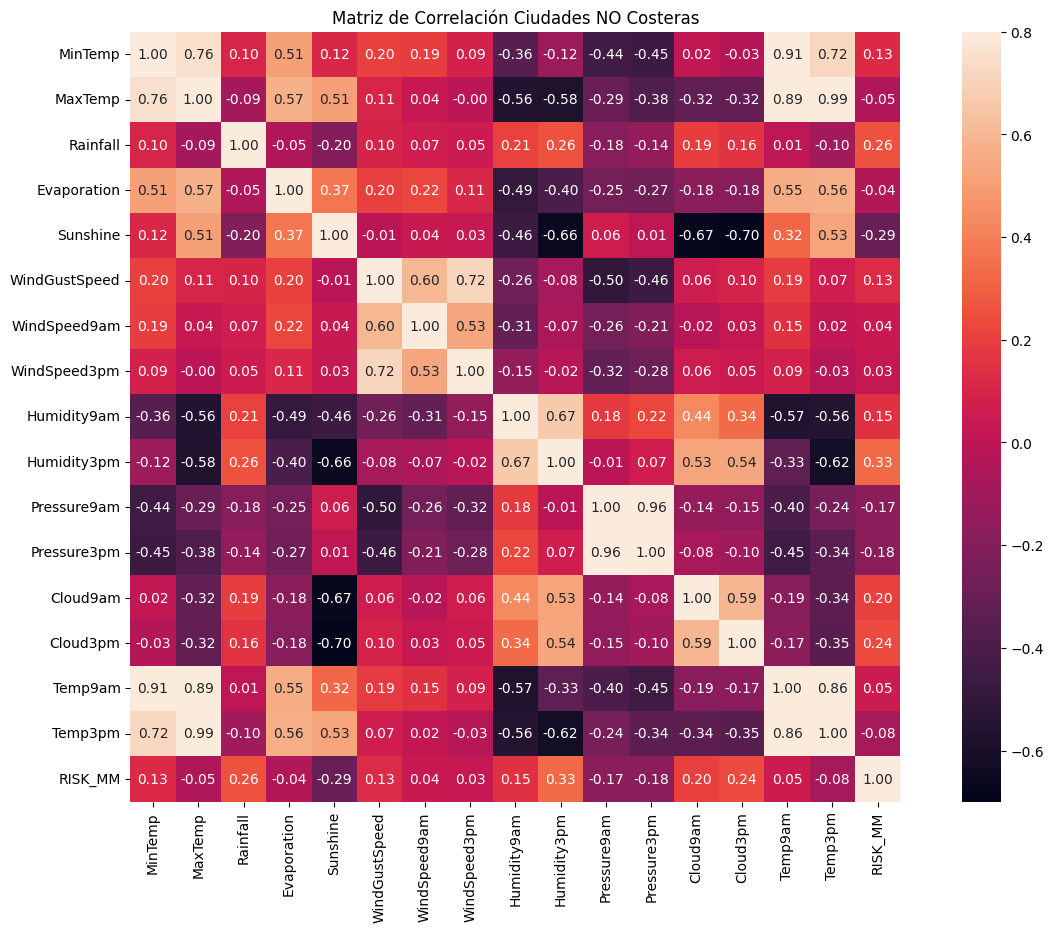

In [299]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(data_corr, vmax=.8, square=True, annot=True, fmt='.2f');
plt.title("Matriz de Correlación Ciudades NO Costeras")
plt.show()

#### BoxPlot

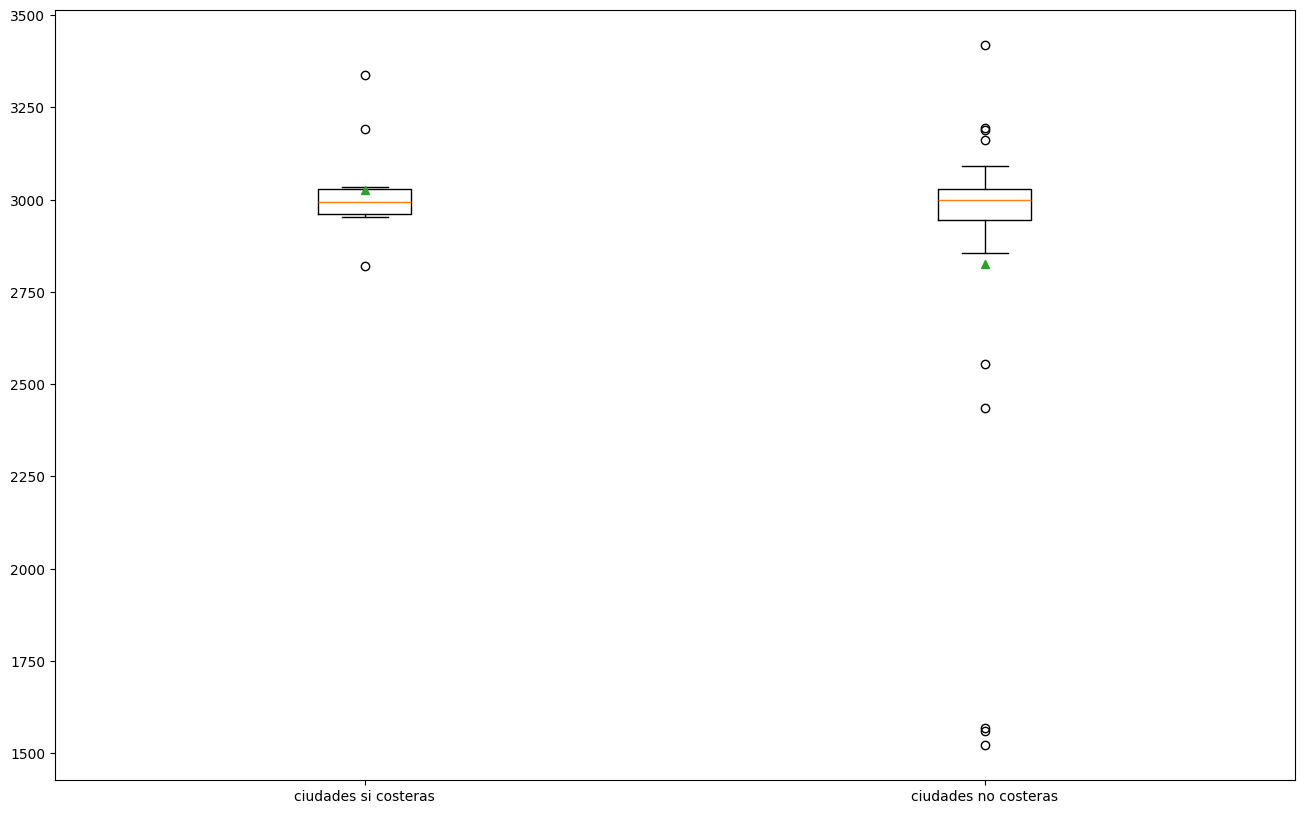

In [301]:
plt.boxplot([ciudades_si_costeras['Count'].values,ciudades_no_costeras['Count'].values],tick_labels=['ciudades si costeras','ciudades no costeras'],showmeans=True)
plt.show()